

<center>
<h1>Lecture 3: Support vector machine (SVM)</h1>
<br>
<h3>Advanced Business Analytics (CIS442D/85)</h3>
<h3>Simon Business School</h3>
<h3>1/18/2017</h3>
</center> 

Some of the figures in this presentation are taken from "An Introduction to Statistical Learning, with applications in R"  (Springer, 2013) with permission from the authors: G. James, D. Witten,  T. Hastie and R. Tibshirani 
(<a href="http://www-bcf.usc.edu/~gareth/ISL/">link</a>)

___
<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

# (1) SVM

* One of the most important and widely used classification algorithms
* Seminal paper on SVM appeared in 1995 and gained more than 23,000 citations (<a href="https://scholar.google.com/scholar?hl=en&q=%E2%80%9CSupport-vector+networks%E2%80%9D%2C+C.+Cortes%2C+V.+Vapnik&btnG=&as_sdt=1%2C33&as_sdtp=">Google scholar</a>) 
* Extremely efficient in implementing high dimensional feature spaces 
* Versatile - can be applied to complex objects (strings, graphs)
* Implementations: 
<a href="http://scikit-learn.org/stable/modules/svm.html">Python</a>,
<a href="https://cran.r-project.org/web/packages/e1071/index.html">R</a>,
<a href="http://www.csie.ntu.edu.tw/~cjlin/libsvm/">Other programming languages</a>

___ 
<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

# (2) Classification problems

* Examples: 
    1. Assessing medical condition (use given age, blood pressure, ..., to predict disease A/B)
    2. Detecting fraudelant bank transaction (use IP address, frequency of transactions, time of day, ..., to predict Y/N)
    3. Inappropriate content on facebook (use user information, text, image, ..., to predict Y/N)
* Properties
  - Observable and unobservable data
  - Predict categorical/qualitative value 
  - Availablility of historical data (supervised learning)
  
* Why do we need classification algorithms? why not use experts?
* How to approach such problems?
___
<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

# (3) Standard approach to classification problem
<table style="width:400px">
    <tr>
        <td>IP</td>
        <td>Country</td>
        <td>Post contains offensive words</td>
        <td>Number of complaints</td>
        <td>...</td>
        <td>Inappropriate content</td>
    </tr>
    <tr>
        <td>128.151.150.9</td>
        <td>USA</td>
        <td>N</td>
        <td>0</td>
        <td>...</td>
        <td>N</td>        
    </tr>    
    <tr>
        <td>5.39.127.255 </td>
        <td>France</td>
        <td>N</td>
        <td>0</td>
        <td>...</td>
        <td>Y</td>        
    </tr>  
</table>
- Organize __training__ data in a matrix:
- Rows: data points/observations (specific facebook posting)
- Input variables/independent variables/attributes/features/predictors: IP, Country, ...
- Output variables/dependent variables/response/labels: Inappropriate content (Y/N)
- How to choose features?
___
<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>




# (4) Standard approach to classification problem - cont.
<table>
    <tr>
        <th>$X_1$</th>
        <th>$X_2$</th>
        <th>$X_3$</th>
        <th>...</th>
        <th>$X_p$</th>
        <th>$Y$</th>
    </tr>
    <tr>
        <td>$x_{1,1}$</td>
        <td>$x_{1,2}$</td>
        <td>$x_{1,3}$</td>
        <td>...</td>
        <td>$x_{1,p}$</td>
        <td>$Y_1$</td>
    </tr>
    <tr>
        <td>$x_{2,1}$</td>
        <td>$x_{2,2}$</td>
        <td>$x_{2,3}$</td>
        <td>...</td>
        <td>$x_{2,p}$</td>
        <td>$Y_2$</td>
    </tr>
    <tr>
        <td>...</td>
        <td>...</td>
        <td>...</td>
        <td>...</td>
        <td>...</td>
        <td>...</td>
    </tr>    
    <tr>
        <td>$x_{n,1}$</td>
        <td>$x_{n,2}$</td>
        <td>$x_{n,3}$</td>
        <td>...</td>
        <td>$x_{n,p}$</td>
        <td>$Y_n$</td>
    </tr>

</table>

- Data:
    - $n$ observations
    - Observation $i$: $\bar{x}_i=(x_{i,1},...,x_{i,p})$ ($p$ features)
    - Label $i$: $y_i$ (assume 2 classes: -1, +1) 
- Goal: 
    - construct a classifier
    - mapping from $\{(X_1,X_2,...,X_p)\}$ to $\{-1,+1\}$
<!--- - Linear models for classification: Logistic regression, Linear discriminant analysis (CIS417)--->
<!---- SVM - Linear model, different approach--->
- SVM: linear model for classification
___
<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

# (5) Linear algebra in 2D

* $\mathbb{R}^2=\{(x_1,x_2)\}$ - $2$-dimensional real space
<img src="Chapter9/ex1.png" style="width:200px;height:200px;"/>

* Line in $\mathbb{R}^2$
    - Defined using $\beta_0,\beta_1,\beta_2$
    - $\{(x_1,x_2):\beta_0+\beta_1 x_1 + \beta_2 x_2=0\}$
- Divides the plane to three regions:
    - $\beta_0+\beta_1 x_1 + \beta_2 x_2 = 0$
    - $\beta_0+\beta_1 x_1 + \beta_2 x_2 < 0$
    - $\beta_0+\beta_1 x_1 + \beta_2 x_2 > 0$
* Distance of a point from the line
$d(x)
=\frac{\beta_0+\beta_1 x_1 + \beta_2 x_2}{\sqrt{\beta_1^2+\beta_2^2}}
=\frac{\beta_0+\beta_1 x_1 + \beta_2 x_2}{||\beta||}$
___
<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

# (6) Exercise 1: Algebra

The figure below depicts a line: 
<img src="Chapter9/ex1.png" style="width:300px;height:300px;"/>

3. Find a (linear) equation that defines the line. What are the values of $\beta_0,\beta_1,\beta_2$?
4. Which value does the line equation responds to (1,-1)? 
5. Which value does the line equation responds to (0,1) and (1,1)? What is their sign?
6. Which value does the line equation responds to (-1,-1) and (0,-1)? What is their sign?
7. Find the distance of the point (3,3) from the line
8. Reconstruct the figure using the line equation


Asnwers:
3. $\beta_0=1, \beta_1=-3, \beta_2=-2$ 
4. 0
5. -1, -4, Negative
6. 6, 3, Positive
7. -3.33

# (7) Identifying spam emails
- Goal: identify spam emails
- input variables: email length, number of words from a blacklist
- output variable: spam (+1), not spam (-1)
   
<table>
    <tr>
        <th>Email length ($X_1$)</th>
        <th>Number of words from a blacklist ($X_2$)</th>
        <th>Spam ($Y$)</th>
    </tr>
    <tr>
        <td>20</td>
        <td>9</td>
        <td>-1</td>
    </tr>  
    <tr>
        <td>16</td>
        <td>0</td>
        <td>+1</td>
    </tr>      
    <tr>
        <td>...</td>
        <td>...</td>
        <td>...</td>
    </tr>     
</table>    
    
___
<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>    
    
    
    
# (8) Identifying spam emails - cont.  

- Graphical representation:

<img src="example1.png" stylex="width:300px;height:300px;"/>

- How can we classify the data?
___
<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

# (9) Identifying spam emails - cont.  

- Using a line for classification:

<img src="example2.png" stylex="width:300px;height:300px;"/>

- Algorithm: 
    - Compute line equation (the coefficients $\beta_0,\beta_1,\beta_2$)
    - Classify:
        - respond -1 if $\beta_0+\beta_1 x_1 + \beta_2 x_2 < 0$ (distance is negative)
        - respond +1 when $\beta_0+\beta_1 x_1 + \beta_2 x_2 > 0$ (distance is positive)
        - distance indicates significance
___
<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

# (10) Using linear classifiers

Q1. What if there are more than 2 features?

Q2. Which line to choose?

Q3. How to find the line?


Q4. What if the observations are not separable?

Q5. What if the decision boundry is non-linear?

___
<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

# (11) Q1: $P$-dimensional input space

* $\mathbb{R}^p=\{(x_1,x_2,...,x_p)\}$ - $p$ dimensional real space
* Line in $\mathbb{R}^2$ $\rightarrow$ Hyperplane in $\mathbb{R}^p$: 
- Defined using $p+1$ coefficients $\beta_0,\beta_1,...,\beta_p$
    - $\{(x_1,x_2,...,x_p):\beta_0+\beta_1\cdot x_1 + ... + \beta_p\cdot x_p=0\}$
    - Divides points in $\mathbb{R}^p$ to three groups:
        - $\beta_0+\beta_1\cdot x_1 + ... + \beta_p\cdot x_p = 0$
        - $\beta_0+\beta_1\cdot x_1 + ... + \beta_p\cdot x_p < 0$
        - $\beta_0+\beta_1\cdot x_1 + ... + \beta_p\cdot x_p > 0$
* Distance of a point from the hyperplane
$d(x)
=\frac{\beta_0+\beta_1\cdot x_1 + ... + \beta_p\cdot x_p}{\sqrt{\beta_1^2+\beta_2^2+...+\beta_p^2}}
=\frac{\beta_0+\beta_1\cdot x_1 + ... + \beta_p\cdot x_p}{||\beta||}$

* Classification
  - Respond y=+1 if $\beta_0+\beta_1\cdot x_1 + ... + \beta_p\cdot x_p > 0$
  - Respond y=-1 if $\beta_0+\beta_1\cdot x_1 + ... + \beta_p\cdot x_p < 0$
  - The absolute value of $\beta_0+\beta_1\cdot x_1 + ... + \beta_p\cdot x_p$ indicates how confident we are in the classification

* Answer to question 1

___
<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

# (12) Linear separability and separating hyperplanes

* Linear separability: we can draw a line (hyperplane) that perfectly separates data points from the two classes
* A seperating hyperplane satisfies:
  - If $y_i=+1$ then  $\beta_0+\beta_1 x_{i,1} + ... + \beta_p x_{i,p} > 0$
  - If $y_i=-1$ then  $\beta_0+\beta_1 x_{i,1} + ... + \beta_p x_{i,p} < 0$
  - Equivalently: $y_i(\beta_0+\beta_1 x_{i,1} + ... + \beta_p x_{i,p})>0$ for all $i$

<figure>
  <img src="Chapter9/9.2-1.png" style="width:70%;height:70%;"/>
  <figcaption> Left: multiple separating hyperplanes; Right: decision boundry for a separating hyperplane.</figcaption>
</figure>

* Ignore Q4 and Q5 for now, and assume training data is linearily separable

___
<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

# (13) Exercise 2: finding a separating hyperplane in 2D

The file ex2data.csv contains information about 2-dimensional data points and their classes. 
1. Plot the data.
2. Is the data linearly separable? 
3. If so, find the equation of a separating hyperplane

In [1]:
from sklearn import svm # read more at: scikit-learn.org
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load data
df = pd.read_csv('ex2data.csv')
df.head()

X1        X2  class
0 -2.157363 -2.326500  False
1  1.277354 -2.745816  False
2  1.982858 -1.633554   True
3 -2.652544 -0.319240  False
4 -1.251667  2.021942  False

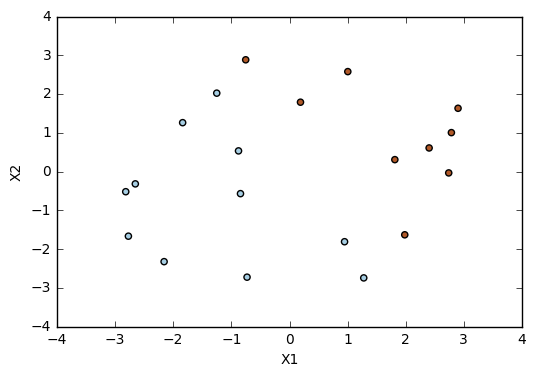

In [3]:
# plot
plt.scatter(df['X1'], df['X2'], c=df['class'], cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

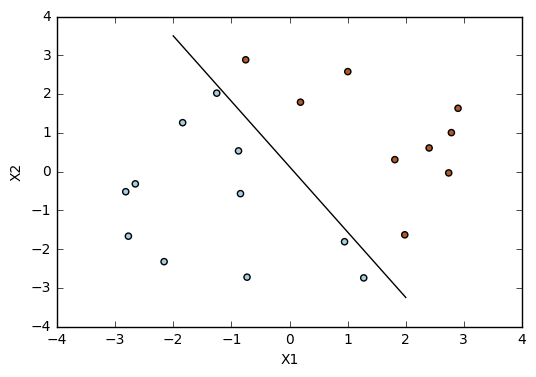

In [4]:
# plot
# the line passes through (-2,3.5) and (2,-3.25)
fig, ax = plt.subplots()
plt.scatter(df['X1'], df['X2'], c=df['class'], cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')
plt.plot([-2,2],[3.5,-3.25],'-k')

- how to find a separating hyperplane in $\mathbb{R}^n$?
- did we choose the right hyperplane? 

In [5]:
# solution of a system of equations to find a hyperplane passing through(-2,3.5) and (2,-3.25)
beta0=1
A = [[-2,3.5],[2,-3.25]]
b = [-1, -1]
beta1, beta2 = np.linalg.solve(A,b).tolist()
print('Separating hyperplane coefficients:',beta0,beta1,beta2)

Separating hyperplane coefficients: 1 -13.5 -8.0


# (14) Q2: The maximal margin classifier

<figure>
  <img src="Chapter9/9.2-1.png" style="width:50%;height:50%;"/>
</figure>


* Intuition: choose the line with the best separation = highest margin
* Margin: the minimal distance from observations to the hyperplane

Example on board (margins for each separating hyperplanes)

___
<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
# (15) Q2: The maximal margin classifier - cont.

<img src="Chapter9/9.3-1.png" style="width:40%;height:40%;float: right;"/>

* The maximal margin classifier - a separating hyperplane with maximal margin


* Observations
    - By definition, there are no points inside the margin
    - Margin increased 
    - 3 training observations are in equal distance from the hyperplane - "Support vectors"
        - "Support" the hyperplane
        - These observations are vectors in $\mathbb{R}^p$
    - If non-support vectors are move (or removed), the hyperplane does not change
    
    
* Answer to question 2
___
<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

# (16) Q3: Constructing the maximal margin classifier *
\* optional material - assumes knowledge about optimization

- Main point: __the maximal margin classifier can be computed efficiently__


- Let $M$ denote the margin size
- Distance of $(x_1,x_2,...,x_p)$ from the hyperplane $\beta$: 
<center>
$d=\frac{|(\beta_0+\beta_1 x_1 + ... + \beta_p x_p)|}{||\beta||}\geq M$
</center>
- Look for a hyperplane $\beta=(\beta_0,\beta_1,...,\beta_p)$ that
    1. Correctly classifies observations: $y_i(\beta_{0}+\beta_1 x_{i,1} + ... + \beta_p x_{i,p})>0$ for all $i$
    2. Distance of all points is greater than $M$:
<center>
$y_i\frac{(\beta_{0}+\beta_1 x_{i,1} + ... + \beta_p x_{i,p})}{||\beta||}\geq M$,
</center>
    3. M is maximal
    
    
- Formulate as optimization problem: 
<center>
$
\begin{array}{lll}
\max_{\beta_0,...,\beta_p,M} & M\\
s.t. & y_i\frac{\beta_{0}+\beta_1 x_{i,1} + ... + \beta_p x_{i,p}}{||\beta||} \geq M & \text{for all }i
\end{array}
$
</center>


- Transform objective using a monotonically decreasing function: (results in the same solution)
<center>
$
\begin{array}{lll}
\min_{\beta_0,...,\beta_p,M} & \frac{1}{2M^2}\\
s.t. & y_i\frac{\beta_{0}+\beta_1 x_{i,1} + ... + \beta_p x_{i,p}}{||\beta||} \geq M & \text{for all }i
\end{array}
$
</center>


* We can scale $\beta$ without changing the objective value (set $||\beta||=\frac{1}{M}$)
<center>
$
\begin{array}{lll}
\min_{\beta_0,...,\beta_p} & \frac{1}{2}||\beta||^2\\
s.t. & y_i(\beta_{0}+\beta_1 x_{i,1} + ... + \beta_p x_{i,p}) \geq 1 & \text{for all }i
\end{array}
$
</center>


* Quadratic programming problem - can be solved efficently

* Answered question 3
___
<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

# (17) Exercise 3: Computing the maximal margin separating hyperplane*

http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

\* approximately, when the data is linearily separable

In [6]:
df.head()

X1        X2  class
0 -2.157363 -2.326500  False
1  1.277354 -2.745816  False
2  1.982858 -1.633554   True
3 -2.652544 -0.319240  False
4 -1.251667  2.021942  False

In [7]:
# find the maximal separating hyperplane (* see comment above)
clf = svm.SVC(kernel='linear',C=10**10)
clf.fit(df[['X1','X2']], df['class'])

SVC(C=10000000000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [8]:
# print beta (the hyperplane coefficents) and the support vectors
beta1,beta2 = clf.coef_[0]
beta0 = clf.intercept_[0]
M = 1/np.sqrt(beta1**2 + beta2**2)
print('beta0=%6.2f \nbeta1=%6.2f \nbeta2=%6.2f'%(beta0,beta1,beta2))
print('Margin:', M)
print('support vectors indexes:', clf.support_)
df.ix[clf.support_,:]

beta0= -0.95 
beta1=  1.96 
beta2=  1.19
Margin: 0.43619727598
support vectors indexes: [ 4  2 11]


X1        X2  class
4  -1.251667  2.021942  False
2   1.982858 -1.633554   True
11 -0.753516  2.882799   True

(-3, 4)

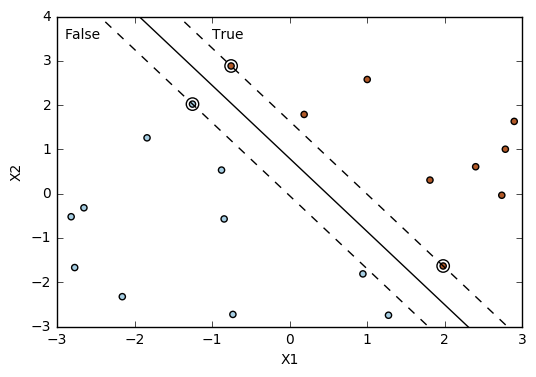

In [9]:
# plot hyperplane, margins and support vectors
fig, ax = plt.subplots()
ax.scatter(df['X1'], df['X2'], c=df['class'], cmap=plt.cm.Paired)
X1_range = [-3,3]
X2_hyperplane = list(map(lambda x1:(-beta0-beta1*x1)/beta2, X1_range))
X2_margin1 = list(map(lambda x1:(-beta0-M*np.sqrt(beta1**2+beta2**2)-beta1*x1)/beta2, X1_range))
X2_margin2 = list(map(lambda x1:(-beta0+M*np.sqrt(beta1**2+beta2**2)-beta1*x1)/beta2, X1_range))

ax.plot(X1_range,X2_hyperplane,'-k')
ax.plot(X1_range,X2_margin1,'--k')
ax.plot(X1_range,X2_margin2,'--k')
ax.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], s=80, facecolors='none')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.text(-1, 3.5, 'True')
ax.text(-2.9, 3.5, 'False')
ax.set_xlim([-3,3])
ax.set_ylim([-3,4])    

Observations
- support vectors in the table and figure
- perfect classification of training data
- equal distance 
- no points within margins

In [10]:
# classify new points
clf.predict([[3., 3.] , [-3., -3.]])

array([ True, False], dtype=bool)

# (18) Limitations of the maximal margin classifier

* Limitations
    1. If the data is not linearily separable, the optimization problem has no solution
<img src="Chapter9/9.4-1.png" style="width:40%;height:40%;"/>   
   
    2. Sensitive to data
<img src="Chapter9/9.5-1.png" style="width:80%;height:80%;"/>

* May want to choose hyperplane that misclassifies in order to acheive:
    1. Robustness to noise/mislabeling
    2. Better classification of most observations

___
<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
# (19) Q4: The support vector classifier

* Reminder: Maximal margin classifier
<center>
$
\begin{array}{lll}
\min & \frac{1}{2}||\beta||^2\\
s.t. & y_i(\beta_{0}+\beta_1 x_{i,1} + ... + \beta_p x_{i,p}) \geq 1 & \text{for all }i
\end{array}
$
</center>
<img src="Chapter9/9.3-1.png" style="width:40%;height:40%;"/>   
* Observations on the margins: $y_i(\beta_{0}+\beta_1 x_{i,1} + ... + \beta_p x_{i,p}) = 1$ (support vectors)
* Use "soft margines"
    - Allow observations to be on the wrong side of the marings (and the hyperplane)
    - Add Penalty to the objective of the optimization problem 

___
<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
# (20) Q4: The support vector classifier - cont.

* Support vector classifier
<center>
$
\begin{array}{lll}
\min & \frac{1}{2}||\beta||^2 + C\sum_{i=1}^{n} \epsilon_i\\
s.t. & y_i(\beta_{0}+\beta_1 x_{i,1} + ... + \beta_p x_{i,p}) \geq 1-\epsilon_i & \text{for all }i\\
& \epsilon_i \geq 0 & \text{for all }i\\
\end{array}
$
</center>
<img src="Chapter9/9.6-1.png" style="width:80%;height:80%;"/>   


* $y_i(\beta_{0}+\beta_1 x_{i,1} + ... + \beta_p x_{i,p})>1$ : out of margin 
* $y_i(\beta_{0}+\beta_1 x_{i,1} + ... + \beta_p x_{i,p})=1$ : on the margin
* $1>y_i(\beta_{0}+\beta_1 x_{i,1} + ... + \beta_p x_{i,p})>0$ : on the wrong side of margin
* $y_i(\beta_{0}+\beta_1 x_{i,1} + ... + \beta_p x_{i,p})<0$ :
on the wrong side of the hyperplane
* Support vectors: 
    - $y_i(\beta_{0}+\beta_1 x_{i,1} + ... + \beta_p x_{i,p})\leq 1$
    - more support vectors (reduces variance)
* Tradeoff between the size of the margin and their violation 
* Answered question 4 (what if the observations are not separable?)
___
<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

# (21) Exercise 4: support vector classifier

The file ex4data.csv contains information about 2-dimensional data points and their class. 
1. Plot the data.
2. Is the data linearly separable? 
3. Plot the seperating plane and margines for C=0.02, 0.05, 0.1, 1

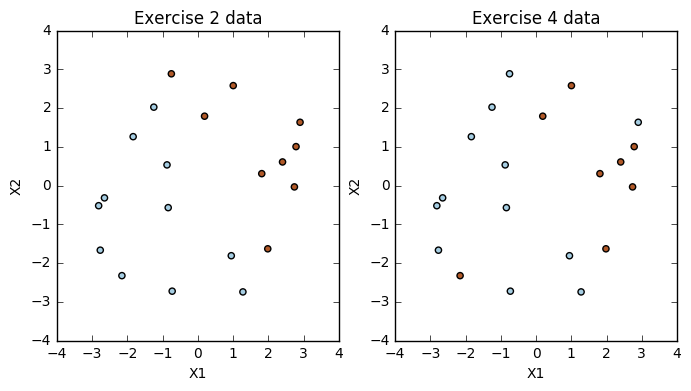

In [11]:
# load data
df1 = pd.read_csv('ex2data.csv')
df2 = pd.read_csv('ex4data.csv')

# plot
fig, axes = plt.subplots(1,2, figsize=(8,4))
axes[0].scatter(df1['X1'], df1['X2'], c=df1['class'], cmap=plt.cm.Paired)
axes[0].set_xlabel('X1')
axes[0].set_ylabel('X2')
axes[0].set_title('Exercise 2 data')


axes[1].scatter(df2['X1'], df2['X2'], c=df2['class'], cmap=plt.cm.Paired)
axes[1].set_xlabel('X1')
axes[1].set_ylabel('X2')
axes[1].set_title('Exercise 4 data')

In contrast to exercise 2, the new data is not linearily separable (a red observation is surrounded by blue observations)

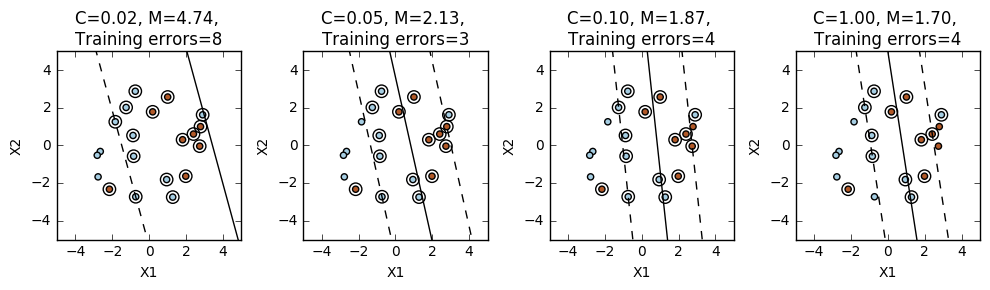

In [12]:
C_range = [0.02, 0.05, 0.1, 1]
fig, axes = plt.subplots(1,len(C_range), figsize=(10,3))
l=5 # display parameter

for i in range(len(C_range)):
    clf = svm.SVC(kernel='linear',C=C_range[i])
    clf.fit(df2[['X1','X2']], df2['class'])

    beta1,beta2 = clf.coef_[0]
    beta0 = clf.intercept_[0]
    M = 1/np.sqrt(beta1**2+beta2**2) # margin
    training_error=sum(clf.predict(df2[['X1','X2']])!=df2['class'])

    
    axes[i].scatter(df2['X1'], df2['X2'], c=df2['class'], cmap=plt.cm.Paired)
    X1_range = [-l,l]
    X2_hyperplane = list(map(lambda x1:(-beta0-beta1*x1)/beta2, X1_range))
    X2_margin1 = list(map(lambda x1:(-beta0-1-beta1*x1)/beta2, X1_range))
    X2_margin2 = list(map(lambda x1:(-beta0+1-beta1*x1)/beta2, X1_range))

    axes[i].plot(X1_range,X2_hyperplane,'-k')
    axes[i].plot(X1_range,X2_margin1,'--k')
    axes[i].plot(X1_range,X2_margin2,'--k')
    axes[i].scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], s=80, facecolors='none')
    axes[i].set_xlabel('X1')
    axes[i].set_ylabel('X2')
    axes[i].set_xlim([-l,l])
    axes[i].set_ylim([-l,l])    
    axes[i].set_title("C=%.2f, M=%.2f, \nTraining errors=%d"%(C_range[i],M,training_error))
        
fig.tight_layout()

In [13]:
# cross validation
from sklearn.cross_validation import cross_val_score

X=df2[['X1','X2']]
Y=df2['class']
clf = svm.SVC(kernel='linear',C=0.1)  
scores = cross_val_score(clf, X, Y, cv=5)
print(scores)
print("C=%.2f Accuracy: %0.2f (+/- %0.2f)" % (0.1,scores.mean(), scores.std()))    

[ 0.8         1.          0.25        0.66666667  1.        ]
C=0.10 Accuracy: 0.74 (+/- 0.28)


In [14]:
# cross validation
from sklearn.cross_validation import cross_val_score

X=df2[['X1','X2']]
Y=df2['class']
results=[]

#for i in np.linspace(0.01,1,100): 
for i in np.logspace(-3, 1, 10):
    clf = svm.SVC(kernel='linear',C=i)  
    scores = cross_val_score(clf, X, Y, cv=5)
    results.append([i,scores.mean(), scores.std()])
    
df_accuracy = pd.DataFrame(data=results,columns=['C','mean','std'])
df_accuracy

C      mean       std
0   0.001000  0.606667  0.061101
1   0.002783  0.606667  0.061101
2   0.007743  0.606667  0.061101
3   0.021544  0.606667  0.061101
4   0.059948  0.743333  0.277208
5   0.166810  0.793333  0.193678
6   0.464159  0.753333  0.208273
7   1.291550  0.753333  0.208273
8   3.593814  0.753333  0.208273
9  10.000000  0.753333  0.208273

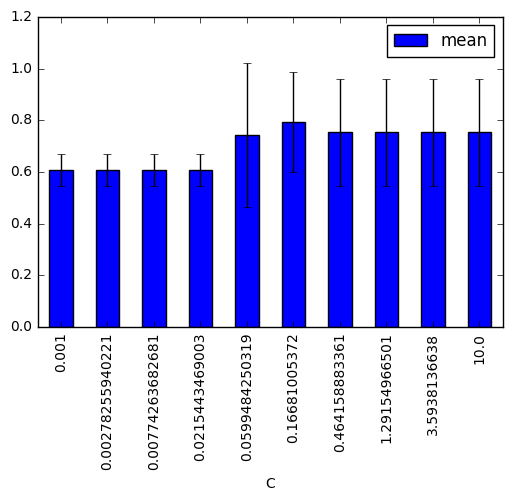

In [15]:
# plot test error per tree depth
df_accuracy.plot.bar(x='C',y='mean',yerr='std')

Lower values of C lead to less variable classifiers (but with more bias)

# (22) Q5: Support vector machine

- We talked about linear classifiers 
- Other linear classifiers: logistic regression, LDA
- Why do we need another one? 

Example on board: 
    * ----- ++++ -----
    * plot table and graph

- Can a linear classifier work well?

___
<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

# (23) Expanding the feature space

* Example 1: 
    - Orignal feature space: $(x_1)$
    - Extended feature space: $(x_1,x_1^2)$ or $(1,\sqrt{2}x_1,x_1^2)$
* Example 2: 
    - Orignal feature space: $(x_1,x_2)$ 
    - Extended feature space: $(x_1,x_2,x_1x_2, x_1^2, x_2^2)$ or $(1,x_1,x_2,\sqrt{2}x_1x_2, x_1^2, x_2^2)$

* Is there a problem with adding features?
     
* Kernel trick
___
<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

# (24) Feature expansion

- In 2D

<table border="0" style="width:70%;height:40%;float: center;">
    <tr>
        <td>
            <center> Original feature space</center>
    <table>
        <tr>
            <th>$X_1$</th>
            <th>$X_2$</th>
            <th>$Y$</th>
        </tr>
        <tr>
            <td>$x_{1,1}$</td>
            <td>$x_{1,2}$</td>
            <td>$Y_1$</td>
        </tr>
        <tr>
            <td>$x_{2,1}$</td>
            <td>$x_{2,2}$</td>
            <td>$Y_2$</td>
        </tr>
        <tr>
            <td>...</td>
            <td>...</td>
            <td>...</td>
        </tr>    
        <tr>
            <td>$x_{n,1}$</td>
            <td>$x_{n,2}$</td>
            <td>$Y_n$</td>
        </tr>
    </table>

</td><td>            <center> Expanded feature space</center>

<table>
    <tr>
        <th>$X_1$</th>
        <th>$X_2$</th>
        <th>$X_1X_2$</th>
        <th>$X_1^2$</th>
        <th>$X_2^2$</th>
        <th>$Y$</th>
    </tr>
    <tr>
        <td>$x_{1,1}$</td>
        <td>$x_{1,2}$</td>
        <td>$x_{1,1}x_{1,2}$</td>
        <td>$x_{1,1}^2$</td>
        <td>$x_{1,2}^2$</td>
        <td>$Y_1$</td>
    </tr>
    <tr>
        <td>$x_{2,1}$</td>
        <td>$x_{2,2}$</td>
        <td>$x_{2,1}x_{2,2}$</td>
        <td>$x_{2,1}^2$</td>
        <td>$x_{2,2}^2$</td>
        <td>$Y_2$</td>
    </tr>
    <tr>
        <td>...</td>
        <td>...</td>
        <td>...</td>
        <td>...</td>
        <td>...</td>
        <td>...</td>
    </tr>    
    <tr>
        <td>$x_{n,1}$</td>
        <td>$x_{n,2}$</td>
        <td>$x_{n,1}x_{n,2}$</td>
        <td>$x_{n,1}^2$</td>
        <td>$x_{n,2}^2$</td>
        <td>$Y_n$</td>
    </tr>
</table>
   
    
</td></tr>    
</table>


- __In SVM there is no computational overhead for many types of feature expansion!__ 

___
<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>


# (25) Support vector machine - cont. *
\* assumes knowledge on convex optimization

* Support vector classifier
<center>
$
\begin{array}{lll}
\min & \frac{1}{2}||\beta||^2 + C\sum_{i=1}^{n} \epsilon_i\\
s.t. & y_i(\beta_0+\beta_{1} x_{i,1} + ... + \beta_p x_{i,p}) \geq 1-\epsilon_i & \text{for all }i\\
& \epsilon_i \geq 0 & \text{for all }i\\
\end{array}
$
</center>

* Equivalent (dual) problem: 
<center>
$
\begin{array}{lll}
\max & \sum_{i=1}^{n}\alpha_i - \frac{1}{2}\sum_{i=1}^{n}\sum_{j=1}^{n}\alpha_i\alpha_jy_iy_jK(\bar{x}_i,\bar{x}_j)\\
   s.t. & 0 \leq \alpha_i \leq C & \text{for all }i\\
        & \sum_{i=1}^{n}\alpha_iy_i=0 & \\
\end{array}
$
</center>

where $K(\bar{x}_i,\bar{x}_j)=\sum_{t=1}^{p}x_{i,t}x_{j,t}$ is the linear kernel

Observations: 
- $\min \rightarrow \max$
- $\beta,\epsilon \rightarrow \alpha$
- What happens to each formulation if there are $10^6$ features? (optimization problem is more difficult versus more setup work in calculating the products)
- We only need the information about the product of feature vectors
- Suppose each vector has two features: $\bar{x}_i = (x_{i,1},x_{i,2})$
<center>
$K(\bar{x}_i,\bar{x}_j) = K((x_{i,1},x_{i,2}),(x_{j,1},x_{j,2})) = x_{i,1}x_{j,1}+x_{i,2}x_{j,2}$
</center>

- Extended feature space: $\bar{x}_i = (1,x_{i,1},x_{i,2},\sqrt{2}x_{i,1}x_{i,2}, x_{i,1}^2, x_{i,2}^2)$
<center>
$K(\bar{x}_i,\bar{x}_j) = 1+2x_{i,1}x_{j,1}+2x_{i,2}x_{j,2}+2x_{i,1}x_{i,2}x_{j,1}x_{j,2}+ x_{i,1}^2x_{j,1}^2+ x_{i,2}^2x_{j,2}^2  = (1+x_{i,1}x_{j,1}+x_{i,2}x_{j,2})^2$
</center>

- __The same computational effort but allowing an exponential number of features!__
- The above is the polynomial kernel of degree 2
___
<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

# (26) Support vector machine - cont. *

* $\beta$ - separating hyperplane equation. 
* Classified based on the sign of $\beta_0+\beta_1 x_1 + ... + \beta_p x_p$ 

* How do we classify now? 
    - In the optimization we compute $\alpha$ and not $\beta$
    * Classifying new points:
    <center>
    $\beta_0+\beta_1 x_1 + ... + \beta_p x_p
    =\sum_{i\in \{1..n\}} \alpha_iy_iK(\bar{x},\bar{x}_i) + \beta_0
    =\sum_{i\in\{SV\}} \alpha_iy_iK(\bar{x},\bar{x}_i) + \beta_0$
    </center>
    * clf.predict(list_of_observations) - returns a same-size array of predictions
___
<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

# (27) Exercise 5: support vector machine
1. Plot the data in ex5data.csv
2. Is the data linearily separable?
3. Fit the data to an SVM model with a polynomial kernel of degree 2 and tuning parameter C=10 (clf = svm.SVC(kernel='poly',C=10, degree=2))
4. Visualize the prediction of the classifier (i.e., the different regions of classification)
5. What is the number of training errors?
6. Repeat the fitting with C=[0.01,0.1,1]. What is the influence of C?

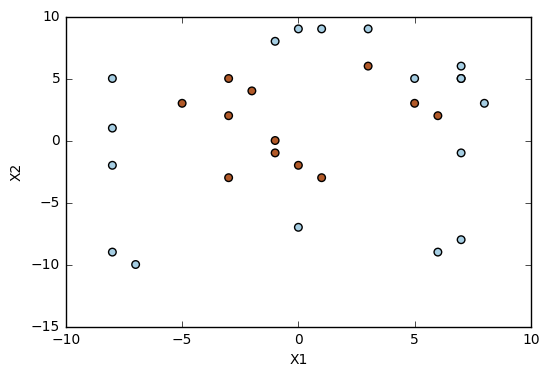

In [16]:
# load data
df = pd.read_csv('ex5data.csv')

# plot
fig, ax = plt.subplots()
plt.scatter(df['X1'], df['X2'], c=df['Y'], s=30, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

In [17]:
# fit SVM with polynomial kernel 
clf = svm.SVC(kernel='poly', degree=2, C=10)
clf.fit(df[['X1','X2']], df['Y'])

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=2, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

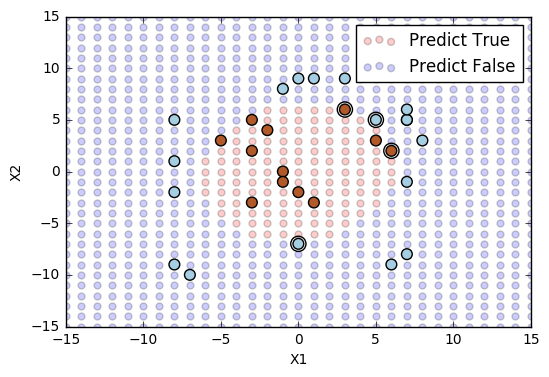

In [18]:
# plot predictions
fig, ax = plt.subplots()
l=15
support = [(i,j) for i in np.linspace(-l,l,31) for j in np.linspace(-l,l,31)]
df_background = pd.DataFrame(data=support, columns=['X1','X2'])
df_background['prediction']=clf.predict(support) 
df_background[df_background['prediction']==True].plot.scatter('X1','X2',color='r', alpha=.2, s=25,ax=ax,label='Predict True')
df_background[df_background['prediction']==False].plot.scatter('X1','X2',color='b',alpha=.2, s=25,ax=ax,label='Predict False')
ax.set_xlim([-l,l])
ax.set_ylim([-l,l])

# plot observations
plt.scatter(df['X1'], df['X2'], c=df['Y'], cmap=plt.cm.Paired,s=60)

# plot support vectors
ax.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], s=120, facecolors='none')

In [19]:
# Compute the number of training errors
df['prediction']=clf.predict(df[['X1','X2']])
df.head()

Unnamed: 0  X1  X2      Y prediction
0           0   6  -9  False      False
1           1   7   5  False      False
2           2  -2   4   True       True
3           3   0  -2   True       True
4           4  -8   1  False      False

In [20]:
training_errors = (df['Y']!=df['prediction']).sum()
training_errors

0

In [21]:
# Repeat with multiple values of C
C_range = [0.01,0.1,1]
fig, axes = plt.subplots(1,len(C_range), figsize=(10,4))

for i in range(len(C_range)):
    C_ = C_range[i]
    
    # fit SVM with polynomial kernel 
    clf = svm.SVC(kernel='poly',C=C_, degree=2)
    clf.fit(df[['X1','X2']], df['Y'])

    # plot predictions
    l=15
    support = [(k,j) for k in np.linspace(-l,l,31) for j in np.linspace(-l,l,31)]
    df_bg = pd.DataFrame(data=support, columns=['X1','X2'])
    df_bg['prediction']=clf.predict(support) 
    df_bg[df_bg['prediction']==True].plot.scatter('X1','X2',color='r', alpha=.2, s=25,ax=axes[i])
    df_bg[df_bg['prediction']==False].plot.scatter('X1','X2',color='b',alpha=.2, s=25,ax=axes[i])
    axes[i].set_xlim([-l,l])
    axes[i].set_ylim([-l,l])

    # plot observations
    axes[i].scatter(df['X1'], df['X2'], c=df['Y'], cmap=plt.cm.Paired,s=60)
    axes[i].scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], s=120, facecolors='none')
    training_errors = (df['Y']!=clf.predict(df[['X1','X2']])).sum()
    axes[i].set_title('C=%.2f\n Support vectors:%d\n Training errors:%d'%(C_,clf.support_.shape[0],training_errors))
    
fig.tight_layout()

Observation: the number of training errors and support vectors tend to increase

# (28) Kernels

* Linear kernel uses the original feature space
* Polynomial kernel of degree $d$ adds features of the form $x_{i,1}^2$,$x_{i,1}^3$,...,  $x_{i,1}^d$, $x_{i,1}x_{i,2}$, etc.

* Revisit the optimization problem

<center>
$
\begin{array}{lll}
\max & \sum_{i=1}^{n}\alpha_i - \frac{1}{2}\sum_{i=1}^{n}\sum_{j=1}^{n}\alpha_i\alpha_jy_iy_jK(\bar{x}_i,\bar{x}_j)\\
   s.t. & 0 \leq \alpha_i \leq C & \text{for all }i\\
        & \sum_{i=1}^{n}\alpha_iy_i=0 & \\
\end{array}
$
</center>

* Kernel: a measure of the similarity of two observations
* Radial basis kernel: 
    - $K(\bar{x}_i,\bar{x}_j)=e^{-\gamma\sum_{t=1}^{p}(x_{i,t}-x_{j,t})^2}$
    - prediction: $\sum_{i\in\{SV\}} \alpha_iy_iK(\bar{x},\bar{x}_i) + \beta_0>0$
* Classifying complex objects
    - Strings: emails, documents (alternative to bag-of-words), DNA sequences 
    - Graphs: social networks - find similar people in a graph, are two proteins similar?  

* Which kernel should we use? 
___
<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>


# (29) Multiclass classification

* What if we have T classes?
* One-versus-one
    - fit classification models for each pair of classes (${T \choose 2}$ in total)
    - classify to the class with the highest number of 'votes'
    
Example on board 

* One-versus-many
    - fit classification models for each of the classes ($T$ in total)
    - for each class the model returns a hyperplane $(\beta_{i,0},\beta_{i,1},...,\beta_{i,p})$
    - classify based on the highest value of $\beta_{i,0} + \beta_{i,1}x_1 + ... + \beta_{i,p}x_p$
    
Example on board 
___
<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>


# (30) Summary - SVM

* One of the most widely used classification algorithms
* Extremely efficient in implementing high dimensional feature spaces 
* Versatile - can be applied to complex objects (strings, graphs)
* Extensions
    - Multiclass classification
    - Estimating probabilities that an obeservation belongs to each class
    - Support vector regression - prediction of continuous values 
___
<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>